In [57]:
import numpy as np
#import pylandau
from scipy.stats import moyal
from scipy.stats import norm
import uproot as up
from matplotlib import pyplot as plt
plt.style.use('tdrstyle.mplstyle')

In [58]:
# Calculate DIS Q2 from lepton and hadron beam energies and lepton scattered energy E and Theta
def Q2Lepton(E, Theta, Elep, Ehad):
    return 2*E*Elep*(1+np.cos(Theta))

In [59]:
# Calculate DIS Y from lepton and hadron beam energies and lepton scattered energy E and Theta
def YLepton(E, Theta, Elep, Ehad):
    return 1 - E/(2*Elep)*(1-np.cos(Theta))

In [60]:
# Calculate DIS y from relation Q2 = s*x*y
def yFromQ2x(Q2,x, Elep, Ehad):
    s = 4.*Elep*Ehad
    return Q2/s/x

In [61]:
# Calculate DIS x from relation Q2 = s*x*y
def xFromQ2y(Q2,y, Elep, Ehad):
    s = 4.*Elep*Ehad
    return Q2/s/y

In [62]:
# Calculate eta from Theta
def Eta(Theta):
    return -np.log(np.tan(Theta/2))

In [63]:
# converse of theta from eta
def ThetaEta(eta):
    return 2.0*np.arctan(np.exp(-eta)) 

In [64]:
# Calculate scattered lepton angle from DIS variables and lepton and hadron beam energies
def ThetaScatt(Q2,x, Elep, Ehad):
    return 2.0*np.arctan(np.sqrt(4.0*Elep*Elep/Q2-Elep/x/Ehad))

In [65]:
# Calculate scattered lepton energy from DIS variables and lepton and hadron beam energies
def EScatt(Q2,x, Elep, Ehad):
    return Elep*(1.0-Q2/4.0/Elep*(1./x/Ehad - 1./Elep))

In [66]:
# Radiation lengths for various materials
def X0(material):
    if material == "W" :
        return 0.003502591
    elif material == "Fe" :
        return 0.017576835
    elif material == "Brass" :
        return 0.0145
    elif material == "concrete" :
        return 0.115652174
    else :
        print('unknown material')
    return 1

In [67]:
# Calculate length of a material in radiation lengths
def LengthX0(length,material):
    return length/X0(material)

In [68]:
LengthX0(6,"W")

1713.0175918341592

In [69]:
LengthX0(6,"Fe")

341.3583844873096

In [70]:
# Mean energy loss for a muon in 6m of tungsten 
def MeanEnergyLossW(Ebeam):
    return 0.167*Ebeam + 15

In [71]:
# Peak (most probable) energy loss for a muon in 6m of tungsten 
def PeakEnergyLossW(Ebeam):
# This should depend on Ebeam
    return 0.0892*Ebeam + 17.4
#    return 0.105*Ebeam

In [72]:
# Peak (most probable) energy loss for a muon traversing various materials of a given length in meters
# From Landau fit results from Geant-4
def PeakEnergyLoss(Ebeam,length,material):
    if material == "W" :
        return (0.0892*Ebeam + 17.4)*length/6.0
    elif material == "Brass" :
        return (0.0156*Ebeam + 8.22)*length/6.0
    elif material == "Fe" :
        return (0.0107*Ebeam + 8.34)*length/6.0
    elif material == "concrete" :
        return (0.00544*Ebeam + 1.03)*length/6.0
    else :
        return PeakEnergyLossW(Ebeam)*length/6.0*X0("W")/X0(material)

In [73]:
# Mean energy loss for a muon traversing various materials of a given length in meters
# Only fr W, and now use Landau fits results
def MeanEnergyLoss(Ebeam,length,material):
    if material == "W" :
        return MeanEnergyLossW(Ebeam)*length/6.0
    else :
        return MeanEnergyLossW(Ebeam)*length/6.0*X0("W")/X0(material)

In [74]:
# Sigma of energy loss for a muon traversing various materials of a given length in meters
# From Landau fit results from Geant-4
def SigmaEnergyLoss(Ebeam,length,material):
    if material == "W" :
        return 19.0*Ebeam/1000
    elif material == "Brass" :
        return 4.2*Ebeam/1000
    elif material == "Fe" :
        return 5.4*Ebeam/1000
    else :
        return 1
    return 1

In [75]:
PeakEnergyLoss(1000,6,"Brass")

23.820000000000004

In [76]:
def FractionalLoss(Ebeam,length,material):
    return PeakEnergyLoss(Ebeam,length,material) / Ebeam

In [77]:
def MuonECorr(Emeas,length,material):
    frac = FractionalLoss(Emeas,length,material)
#    if frac < 1 :
    return Emeas/(1-frac)
#    else :
#        return Emeas

In [78]:
FractionalLoss(1000,6,"Brass")

0.023820000000000004

In [79]:
MuonECorr(1000-PeakEnergyLoss(1000,6,"Brass"),6,"Brass")

1000.2055147553036

In [80]:
#def SigmaEnergyLoss(Ebeam,length,material):
#    if material == "W" :
#        return PeakEnergyLossW(Ebeam)*length/6.0
#    else :
#        return PeakEnergyLossW(Ebeam)*length/6.0*X0("W")/X0(material)
#    return 1    

In [81]:
# Expression from PDG for multiuple scattering in Theta
def SigmaTheta(Ebeam,length,material):
    return 0.0136/Ebeam*np.sqrt(LengthX0(length,material))*(1.0+0.038*np.log(LengthX0(length,material)))

In [112]:
SigmaTheta(1000,6,"Fe")

0.00030696687329181033

In [83]:
EScatt(100,1E-4,1000,275)

90.93409090909077

In [84]:
yFromQ2x(100,1E-4,1000,275)

0.909090909090909

In [85]:
# incident muon energy
MuonEinc = 1000.0

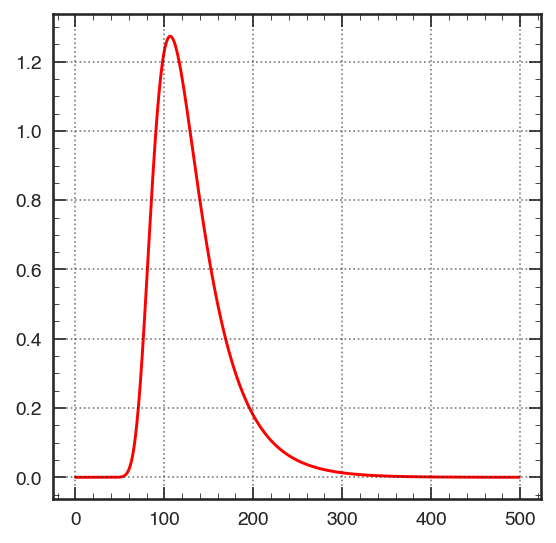

In [86]:
# Plot a Landau distribution for energy deposit by muon in 6m of Tungsten
LossPeak = PeakEnergyLossW(MuonEinc)
SigmaPeak = SigmaEnergyLoss(MuonEinc,6,"W")
xmin = 0
xmax = 500 
dx = 1
x_landau = np.arange(xmin, xmax, dx)
plt.plot(x_landau, moyal.pdf(x_landau,LossPeak,SigmaPeak)*100,'r')

In [87]:
# Monte Carlo simulation Trials
Ntrial = 10000

In [88]:
# Simulate muons traversing an absorber using a Landau distribution for energy deposit by muon in 6m of Tungsten
rv = moyal()
r = moyal.rvs(loc=LossPeak, scale=SigmaPeak, size=Ntrial)

In [89]:
Emuon = MuonEinc-r
#fit_i = 850
#fit_f = 950
fit_i = MuonEinc-130*MuonEinc/1000
fit_f = MuonEinc
fit = Emuon[(Emuon >= fit_i) & (Emuon <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Emuon)

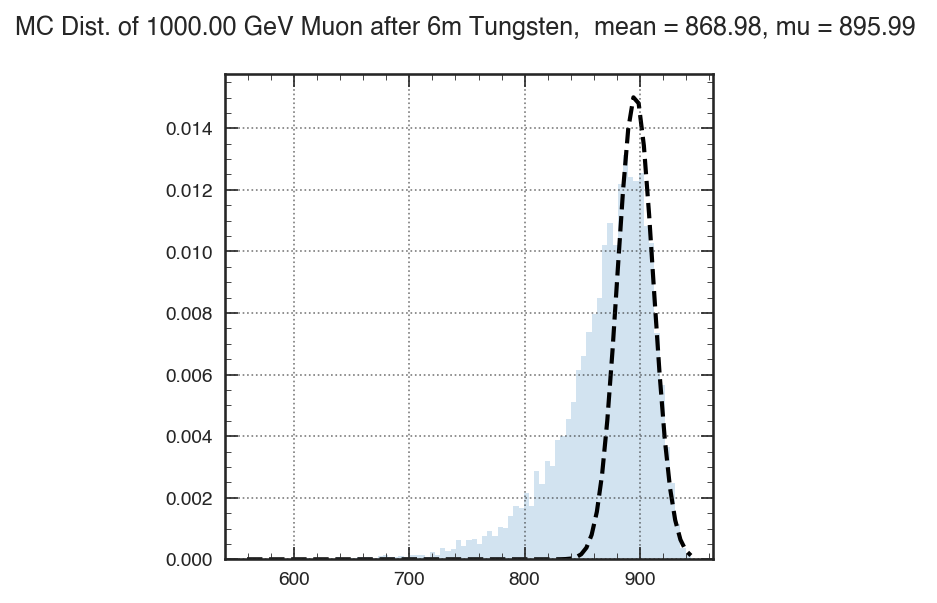

In [90]:
n, bins, patches = plt.hist(Emuon, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('MC Dist. of %.2f GeV Muon after 6m Tungsten,  mean = %.2f, mu = %.2f \n' %(MuonEinc,mean,mu), fontsize=12)
plt.show()
# let's choose peak of scattered energy as most probable value for determing most probable energy loss
#Eloss1000 = MuonEinc - mu

In [91]:
# Now multiple scattering in 6m of Tungsten
EtaInc = -6
Theta = ThetaEta(EtaInc)
SigmaTh = SigmaTheta(MuonEinc,6,"W")

In [92]:
ThetaMu = np.random.normal(Theta, SigmaTh, Ntrial)
EtaMu = Eta(ThetaMu)

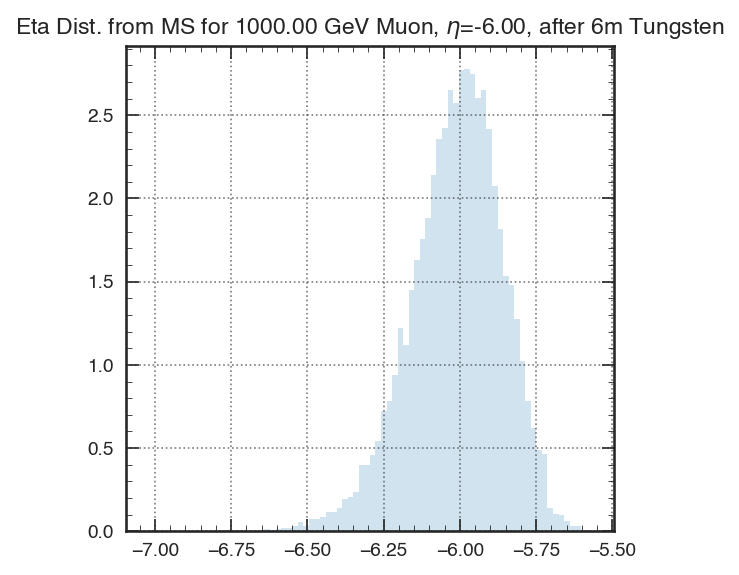

In [93]:
plt.hist(EtaMu, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Eta Dist. from MS for %.2f GeV Muon, $\eta$=%.2f, after 6m Tungsten' % (MuonEinc,EtaInc))
plt.show()

In [94]:
# Simulate muons traversing an absorber using a Landau distribution for energy deposit by muon in 6m of Tungsten
# But take energy and angle from DIS Q2, x, and y
Elep = 1000
Ehad = 275
#Material = "Brass"
Material = "W"
Length = 6
# MC Trials
Ntrial = 10000

In [95]:
Q2true = 20
ytrue = 0.1

In [96]:
xtrue = xFromQ2y(Q2true,ytrue,1000,275)

In [97]:
print('Q2 = %f , x = %f, y = %f' % (Q2true, xtrue, ytrue))

Q2 = 20.000000 , x = 0.000182, y = 0.100000


In [98]:
Ebeam = EScatt(Q2true,xtrue, Elep, Ehad)

In [99]:
Thbeam = ThetaScatt(Q2true,xtrue, Elep, Ehad)

In [100]:
print('Ebeam = %f , EtaBeam = %f' % (Ebeam, Eta(Thbeam)))

Ebeam = 900.005000 , EtaBeam = -6.050356


In [101]:
# Landau distribution for energy deposity by muon in cone
LossPeak = PeakEnergyLoss(Ebeam,Length,Material)
SigmaPeak = SigmaEnergyLoss(Ebeam,Length,Material)
xmin = 0
xmax = Ebeam/2 
dx = 1
x_landau = np.arange(xmin, xmax, dx)

In [102]:
# Simulate muons traversing an absorber using a Landau distribution 
rv = moyal()
r = moyal.rvs(loc=LossPeak, scale=SigmaPeak, size=Ntrial)

In [103]:
Emuon = Ebeam-r
#fit_i = 850
#fit_f = 950
fit_i = Ebeam-150*Ebeam/1000
fit_f = Ebeam-50*Ebeam/1000
fit = Emuon[(Emuon >= fit_i) & (Emuon <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Emuon)

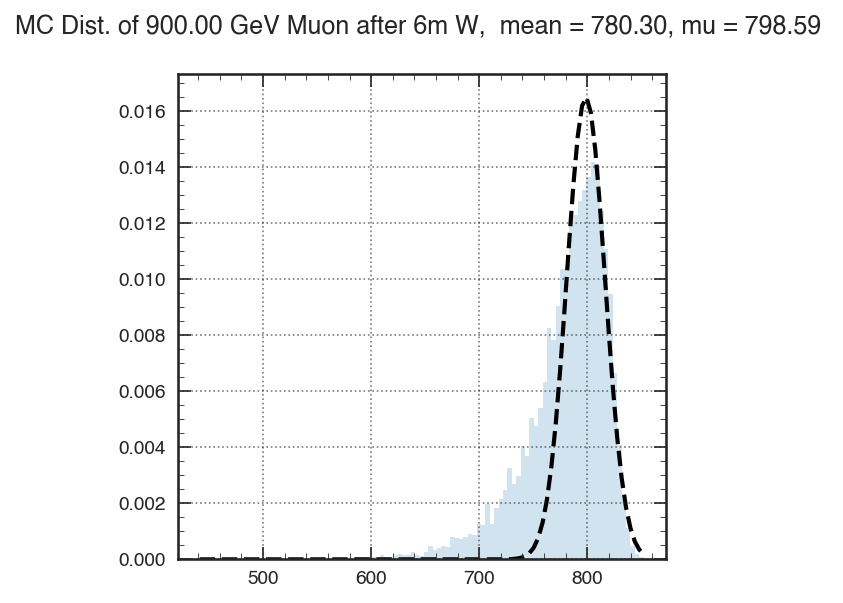

In [104]:
n, bins, patches = plt.hist(Emuon, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('MC Dist. of %.2f GeV Muon after 6m %s,  mean = %.2f, mu = %.2f \n' %(Ebeam,Material,mean,mu), fontsize=12)
plt.show()

In [105]:
# Now multiple scattering in 6m of Tungsten
SigmaTh = SigmaTheta(Ebeam,Length,Material)

In [106]:
ThetaMu = np.random.normal(Thbeam, SigmaTh, Ntrial)
#ThetaMu = np.random.normal(Thbeam, SigmaTh*0.1, Ntrial)
EtaMu = Eta(ThetaMu)

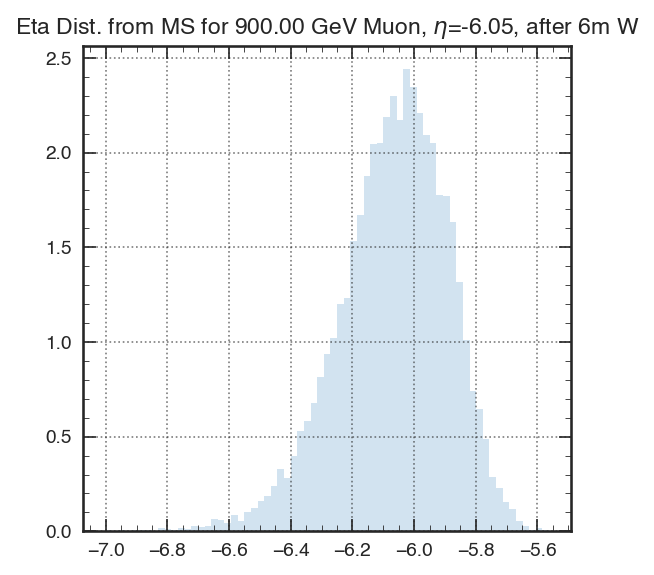

In [107]:
plt.hist(EtaMu, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Eta Dist. from MS for %.2f GeV Muon, $\eta$=%.2f, after 6m %s' % (Ebeam,Eta(Thbeam),Material))
plt.show()

In [108]:
# Let's approximately correct muon energy for peak loss
# But may need more complicated expression because of Theta scattering
# Emuon = Emuon + PeakEnergyLossW(Ebeam)
Emuon = MuonECorr(Emuon,Length,Material)

In [109]:
# Calculate Q2 with random energy loss and multiple scattering, but no smearing of measured muon momentum...
Q2scatt = Q2Lepton(Emuon,ThetaMu, Elep, Ehad)

In [110]:
lower =0
upper = 50
fit_i = 5
fit_f = 30.0
fit = Q2scatt[(Q2scatt >= fit_i) & (Q2scatt <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt)

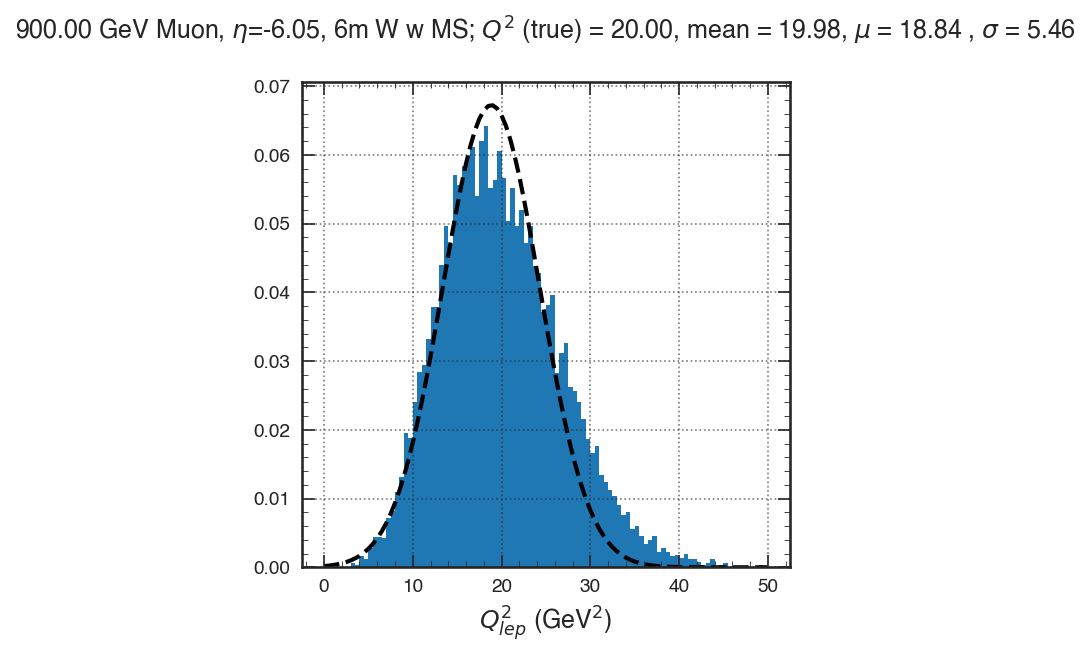

Q2 resolution = %f 0.28965148597296153


In [111]:
n, bins, patches = plt.hist(Q2scatt, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('%.2f GeV Muon, $\eta$=%.2f, 6m %s w MS; $Q^2$ (true) = %.2f, mean = %.2f, $\mu$ = %.2f , $\sigma$ = %.2f \n' %(Ebeam,Eta(Thbeam),Material,Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)